In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

In [ ]:
# Dataset
d=pd.read_excel("/content/Likelihood_2.xlsx")
d

,z,H(z),Sigma
0,0.0907,69.00,12.00
1,0.1700,83.00,8.00
2,0.1790,75.00,4.00
3,0.1990,75.00,5.00
4,0.2400,79.69,2.65
5,0.2700,77.00,14.00
6,0.3520,83.00,14.00
7,0.4000,95.00,17.00
8,0.4300,86.45,3.68
9,0.4800,97.00,62.00


In [ ]:
def Hubble(z,omg_M,omg_L):
  H0=67.8
  Hth=[]
  for i in z:
    t1= H0*m.sqrt((omg_M*pow((1+i),3)+omg_L))
    Hth.append(t1)
  return Hth

In [ ]:
#----------------FINAL MEASURE---------------------------------

X2_min=[]
omg_M=[]
omg_L=[]
X2=[]
d_1=d.copy(deep=True)

for o_m in np.arange(0,1,0.0006):
  omg_M.append(o_m)

  omg_L_tmp=[]
  X2_sub=[]
  for o_l in np.arange(0,1,0.0006):
    omg_L_tmp.append(o_l)
    H_th=np.array(Hubble(d["z"].to_numpy(),o_m,o_l))

    t2=0
    t3=0
    for i,j,k in zip(d_1["H(z)"],H_th,d_1["Sigma"]):
      t2=t2+pow((i-j),2)/pow(k,2)
    X2_sub.append(t2)
    t3=min(X2_sub)
  X2.append(X2_sub)
  omg_L.append(omg_L_tmp)
  X2_min.append(t3)
  
# Coverting to dataframe to ease further calcuations
d1=np.array([omg_M,omg_L,X2,X2_min]).T
d_f=pd.DataFrame(data=d1, columns=["omg_M","omg_L","X2","X2_min"])
d_f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,omg_M,omg_L,X2,X2_min
0,0.0,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[3045.7433556093843, 2931.9026998505033, 2885....",232.22779
1,0.0006,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[2855.663923204222, 2823.107217852912, 2795.55...",230.813499
2,0.0012,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[2778.7663131921863, 2754.9369201350564, 2733....",229.40781
3,0.0018,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[2720.489904548103, 2700.8859882014076, 2682.6...",228.010638
4,0.0024,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[2671.8525390174514, 2654.8639864115753, 2638....",226.621899
...,...,...,...,...
1662,0.9972,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[377.63590328742924, 377.84925396567564, 378.0...",377.635903
1663,0.9978,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[378.4005919477005, 378.6142176038306, 378.827...",378.400592
1664,0.9984,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[379.1659928687893, 379.37989325492504, 379.59...",379.165993
1665,0.999,"[0.0, 0.0006, 0.0012, 0.0018, 0.0024, 0.002999...","[379.93210540872974, 380.1462802773655, 380.36...",379.932105


In [ ]:
Min=min(d_f["X2_min"])
id_1=d_f["X2_min"].astype('float64').idxmin() # Index of min(X2_min)

id_2=d_f["X2"][id_1].index(min(d_f["X2"][id_1]))
print(Min,id_1,id_2)

15.364290464424073 514 1259


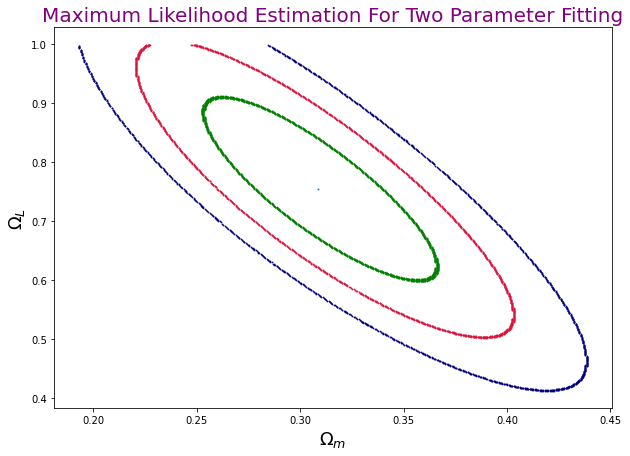

In [ ]:
#For 1-Sigma
x1=[]
y1=[]
#For 2-Sigma
x2=[]
y2=[]
#For 3-Sigma
x3=[]
y3=[]
for i in range(0,len(d_f["omg_M"])):
  for j in range(0,len(d_f["omg_L"][0])):
    t=d_f["X2"][i]
    if (t[j] < Min+2.3+0.05) and (t[j]> Min+2.3-0.05):  # 1-Sigma
      x1.append(d_f["omg_M"][i])
      y1.append(d_f["omg_L"][i][j])
    if (t[j] < Min+6.17+0.05) and (t[j]> Min+6.17-0.05): # 2-Sigma
      x2.append(d_f["omg_M"][i])
      y2.append(d_f["omg_L"][i][j])
    if (t[j] < Min+11+0.05) and (t[j]> Min+11-0.05): # 3-Sigma
      x3.append(d_f["omg_M"][i])
      y3.append(d_f["omg_L"][i][j])

# Plot
plt.figure(figsize=(10,7))
plt.scatter(d_f["omg_M"][id_1],d_f["omg_L"][id_1][id_2],s=0.9)
plt.scatter(x1,y1,color="green",s=0.6)
plt.scatter(x2,y2,color="crimson",s=0.6)
plt.scatter(x3,y3,color="navy",s=0.6)
plt.xlabel(r'$\Omega_m$',size='18')
plt.ylabel(r'$\Omega_L$',size='18')
plt.title('Maximum Likelihood Estimation For Two Parameter Fitting',color='purple',size='20')
plt.show()